# Facial Emotion Recognition (FER) using CNN

In [1]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization
from keras.layers import Conv2D,MaxPooling2D
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint
from keras import initializers
from keras.optimizers import Adam
from livelossplot import PlotLossesKeras
from sklearn.metrics import  classification_report
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
num_classes=7
img_rows,img_cols=48,48
batch_size=32

In [3]:
train_data_dir='images_cleared_dataset/train'
validation_data_dir='images_cleared_dataset/validation'
test_data_dir='images_cleared_dataset/test'

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255, )

In [5]:
train_generator = train_datagen.flow_from_directory(
                        train_data_dir,
                        color_mode='grayscale',
                        target_size=(img_rows,img_cols),
                        batch_size=batch_size,
                        class_mode='categorical',
                        shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
                                validation_data_dir,
                                color_mode='grayscale',
                                target_size=(img_rows,img_cols),
                                batch_size=batch_size,
                                class_mode='categorical',
                                shuffle=True)
test_generator = test_datagen.flow_from_directory(
                                test_data_dir,
                                color_mode='grayscale',
                                target_size=(img_rows,img_cols),
                                batch_size=4412,
                                class_mode='categorical',
                                shuffle=True)

Found 19929 images belonging to 7 classes.
Found 4682 images belonging to 7 classes.
Found 4412 images belonging to 7 classes.


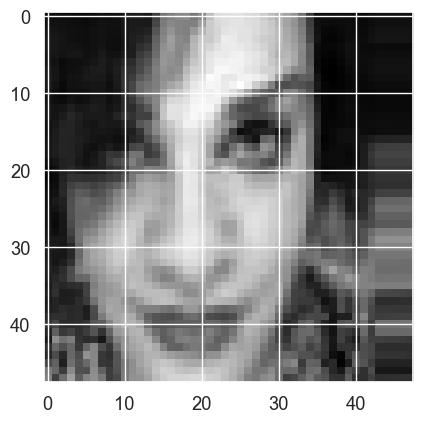

In [69]:
plt.imshow(train_generator[0][0][29],cmap='gray')

In [19]:
model = Sequential()

In [20]:
model.add(Conv2D(32,(3,3),padding='same', kernel_initializer='he_normal',
                 input_shape=(img_rows,img_cols,1), bias_initializer=initializers.Constant(0.1), activation='elu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',
                 input_shape=(img_rows,img_cols,1), bias_initializer=initializers.Constant(0.1), activation='elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [21]:
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal',
                bias_initializer=initializers.Constant(0.1), activation='elu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal',
                bias_initializer=initializers.Constant(0.1), activation='elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [22]:
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal',
                bias_initializer=initializers.Constant(0.1), activation='elu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal',
                bias_initializer=initializers.Constant(0.1), activation='elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [23]:
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal',
                bias_initializer=initializers.Constant(0.1), activation='elu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal',
                bias_initializer=initializers.Constant(0.1), activation='elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [24]:
model.add(Flatten())
model.add(Dense(64,kernel_initializer='he_normal',bias_initializer=initializers.Constant(0.1), activation='elu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

In [25]:
model.add(Dense(64,kernel_initializer='he_normal', bias_initializer=initializers.Constant(0.1), activation='elu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

In [26]:
model.add(Dense(num_classes,kernel_initializer='he_normal', activation='softmax'))

In [27]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 batch_normalization_10 (Bat  (None, 48, 48, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_9 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 batch_normalization_11 (Bat  (None, 48, 48, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                      

In [29]:
model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate = 0.001), 
              metrics=['accuracy'])

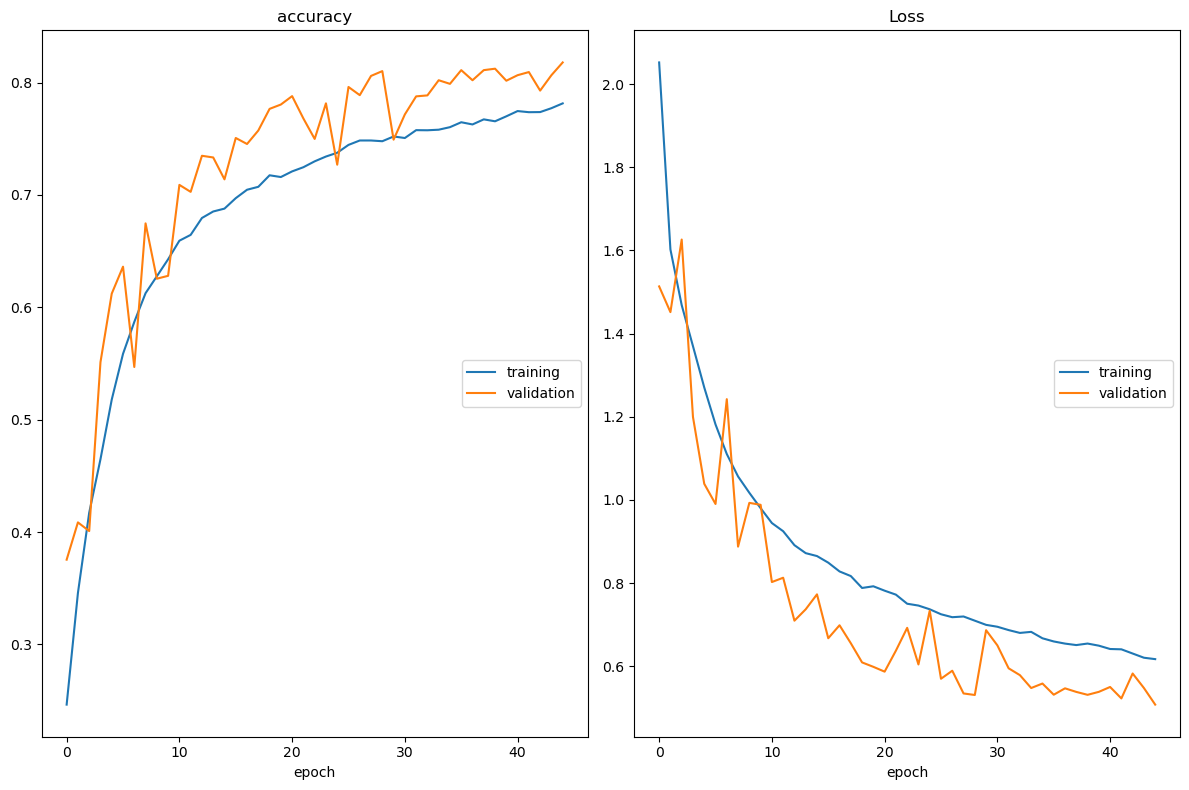

accuracy
	training         	 (min:    0.246, max:    0.781, cur:    0.781)
	validation       	 (min:    0.375, max:    0.818, cur:    0.818)
Loss
	training         	 (min:    0.617, max:    2.052, cur:    0.617)
	validation       	 (min:    0.508, max:    1.626, cur:    0.508)
622/622 [==============================] - 130s 209ms/step - loss: 0.6173 - accuracy: 0.7814 - val_loss: 0.5080 - val_accuracy: 0.8179


In [30]:
nb_train_samples = 19929
nb_validation_samples = 4682
epochs = 45

history=model.fit(
                train_generator,
                steps_per_epoch=nb_train_samples//batch_size,
                epochs=epochs,
                callbacks=[PlotLossesKeras()],
                validation_data=validation_generator,
                validation_steps=nb_validation_samples//batch_size
                )

In [31]:
y_pred = model.predict(test_generator[0][0])

138/138 [==============================] - 5s 31ms/step


In [32]:
s1 = np.argmax(test_generator[0][1], axis=1)
s2 = np.argmax(y_pred, axis=1)
s1_one_hot = test_generator[0][1]
s2_one_hot = y_pred

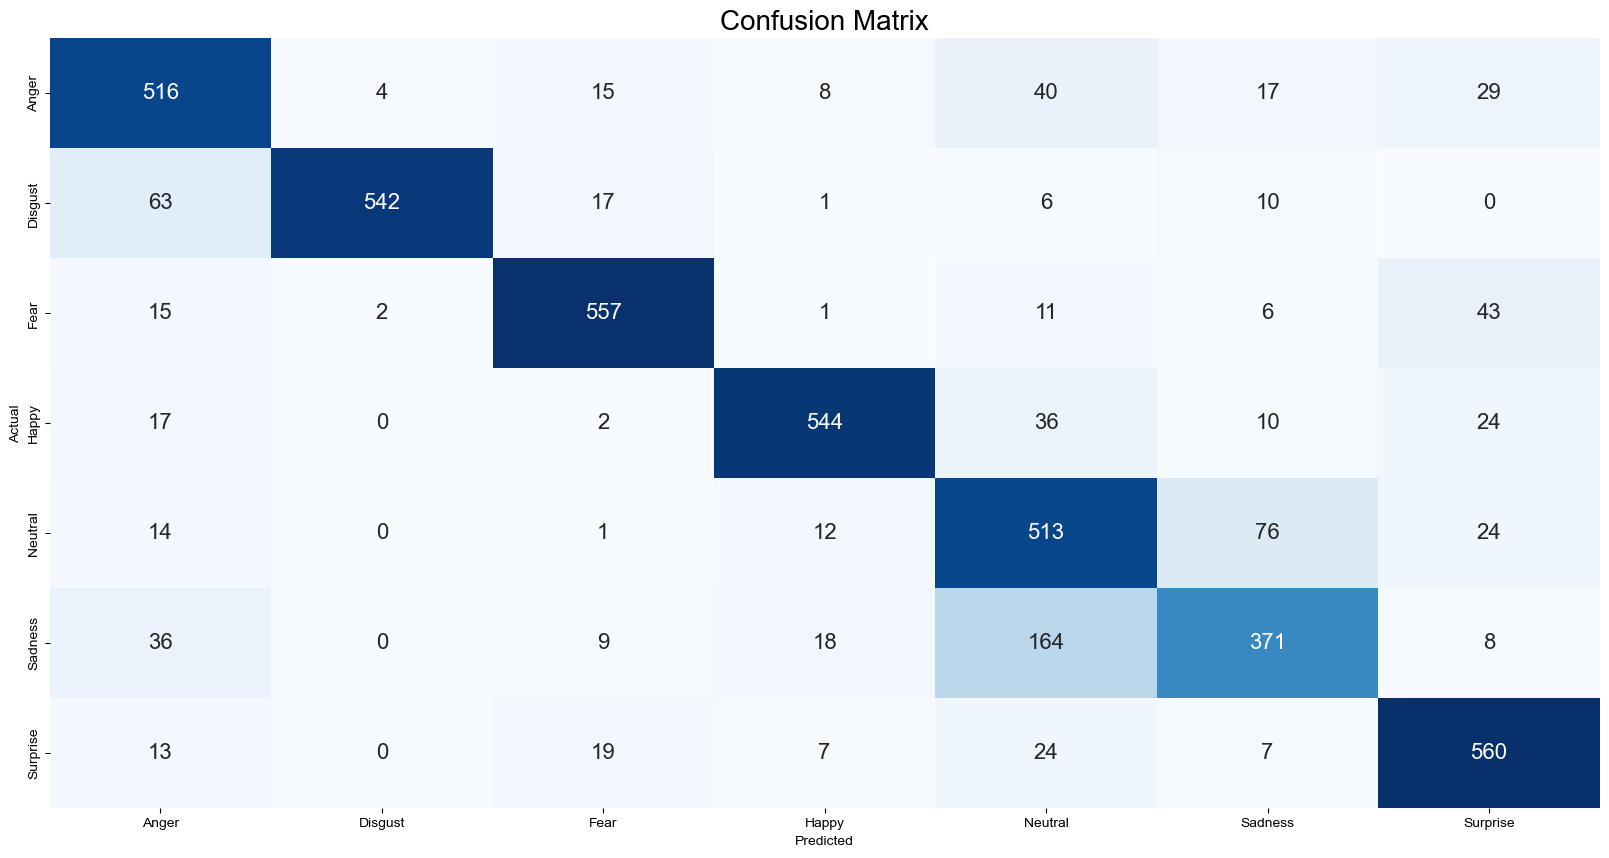

In [36]:
from sklearn.metrics import confusion_matrix
cm_data = confusion_matrix(s1,s2)
CLASS_LABELS  = ['Anger', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sadness', "Surprise"]
cm = pd.DataFrame(cm_data, columns=CLASS_LABELS, index = CLASS_LABELS)
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (20,10))
plt.title('Confusion Matrix', fontsize = 20)
sns.set(font_scale=1.2)
ax = sns.heatmap(cm, cbar=False, cmap="Blues", annot=True, annot_kws={"size": 16}, fmt='g')

In [39]:
print(classification_report(s1, s2))

              precision    recall  f1-score   support

           0       0.77      0.82      0.79       629
           1       0.99      0.85      0.91       639
           2       0.90      0.88      0.89       635
           3       0.92      0.86      0.89       633
           4       0.65      0.80      0.72       640
           5       0.75      0.61      0.67       606
           6       0.81      0.89      0.85       630

    accuracy                           0.82      4412
   macro avg       0.83      0.82      0.82      4412
weighted avg       0.83      0.82      0.82      4412



ROC AUC score: 0.9786658038860472


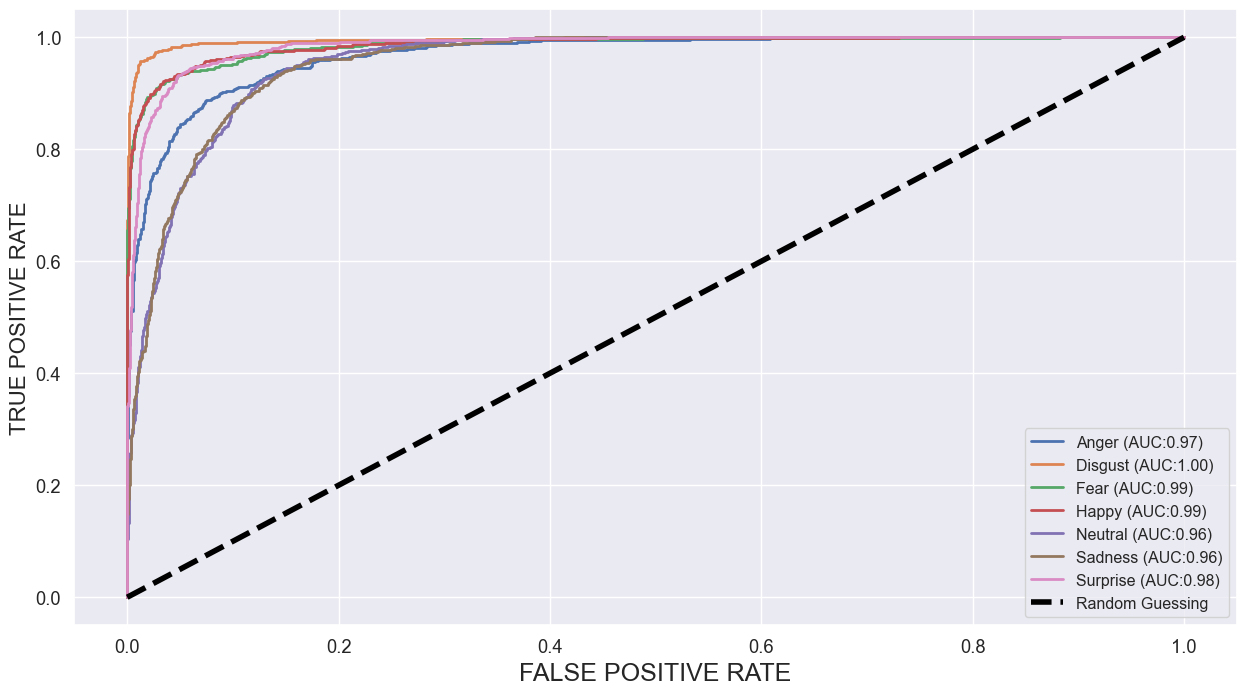

In [40]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score
fig, c_ax = plt.subplots(1,1, figsize = (15,8))

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    for (idx, c_label) in enumerate(CLASS_LABELS):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr,lw=2, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'black',linestyle='dashed', lw=4, label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)

print('ROC AUC score:', multiclass_roc_auc_score(s1_one_hot , s2_one_hot  , average = "micro"))
plt.xlabel('FALSE POSITIVE RATE', fontsize=18)
plt.ylabel('TRUE POSITIVE RATE', fontsize=16)
plt.legend(fontsize = 11.5)
plt.show()

In [41]:
model.save('model_45_epoch_81_per')

INFO:tensorflow:Assets written to: model_45_epoch_81_per\assets


INFO:tensorflow:Assets written to: model_45_epoch_81_per\assets
